In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam

In [10]:
# Load the dataset
df=pd.read_csv(r"C:\Users\tareq\Desktop\p2\Data\cleaned.csv")
label= pd.read_excel(r"C:\Users\tareq\Desktop\p2\Data\Labeled.csv")
df2_cols = df.columns.tolist()
df2_cols.remove('Username')
df2 = df[['Username'] + df2_cols]
# Merge the two dataframes on the 'username' column
result = pd.merge(label, df2, on='Username', how='left')
all=[]
for i in range(len(result)): 
    label=[]
    label.append(int(result['Label'][i].split()[0][1]))
    label.append(int(result['Label'][i].split()[1]))
    label.append(int(result['Label'][i].split()[2]))
    label.append(int(result['Label'][i].split()[3]))
    label.append(int(result['Label'][i].split()[4][0]))
    all.append(label)
result['LABEL']=all
result.drop('Label',axis=1,inplace=True)
df=result.copy()
df['OpennesS']=[x[0] for x in df['LABEL']]
df['ConscientiousnesS']=[x[1] for x in df['LABEL']]
df['ExtraversioN']=[x[2] for x in df['LABEL']]
df['AgreeablenesS']=[x[3] for x in df['LABEL']]
df['NeuroticisM']=[x[4] for x in df['LABEL']]
df.drop(['Username','LABEL'],axis=1,inplace=True)

In [44]:
# Preprocess the text data
tokenizer = Tokenizer(num_words=5000, lower=False,filters='#$%&()*+-<=>@[\\]^_`{|}~\t\n',split = ' ')
tokenizer.fit_on_texts(df["Tweet"])
sequences = tokenizer.texts_to_sequences(df["Tweet"])
X = pad_sequences(sequences, maxlen=200)

# Split the data into training and testing sets
y = df["OpennesS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RNN architecture
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

# Tune hyperparameters
# You can use techniques like grid search or random search to find the best combination of hyperparameters

# Deploy the model
# Once you are satisfied with the performance of the RNN, you can deploy it to make predictions on new data

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 200, 128)          640000    
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 779,905
Trainable params: 779,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
12/12 [=============================

In [45]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(num_units=64, embedding_size=128, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=embedding_size, input_length=200))
    model.add(LSTM(num_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(lr=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

param_grid = {
    "num_units": [32, 64, 128],
    "embedding_size": [64, 128, 256],
    "dropout_rate": [0.2, 0.3, 0.4],
    "learning_rate": [0.001, 0.01, 0.1]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

print(f"Best parameters: {grid_result.best_params_}")

best_model = grid_result.best_estimator_
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

C:\Users\tareq\AppData\Local\Temp\ipykernel_1248\537344514.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)
C:\Users\tareq\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Best parameters: {'dropout_rate': 0.4, 'embedding_size': 256, 'learning_rate': 0.001, 'num_units': 32}


AttributeError: 'KerasClassifier' object has no attribute 'evaluate'

In [118]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=256, input_length=200))
model.add(LSTM(32))
model.add(Dropout(0.4))
model.add(Dense(1, activation="sigmoid"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["TruePositives"])
model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
14/14 [==============================] - 5s 206ms/step - loss: 0.6620 - true_positives: 12.0000 - val_loss: 0.6135 - val_true_positives: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 2s 128ms/step - loss: 0.5773 - true_positives: 0.0000e+00 - val_loss: 0.5786 - val_true_positives: 0.0000e+00
Epoch 3/10
14/14 [==============================] - 2s 130ms/step - loss: 0.4885 - true_positives: 9.0000 - val_loss: 0.5782 - val_true_positives: 0.0000e+00
Epoch 4/10
14/14 [==============================] - 2s 132ms/step - loss: 0.3456 - true_positives: 63.0000 - val_loss: 0.6372 - val_true_positives: 4.0000
Epoch 5/10
14/14 [==============================] - 2s 138ms/step - loss: 0.1690 - true_positives: 118.0000 - val_loss: 0.8364 - val_true_positives: 7.0000
Epoch 6/10
14/14 [==============================] - 2s 140ms/step - loss: 0.1082 - true_positives: 121.0000 - val_loss: 1.2208 - val_true_positives: 1.0000
Epoch 7/10
14/14 [==============================] - 2s

In [102]:
y_pred=model.predict(X_test)

4/4 [==============================] - 0s 29ms/step


In [122]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [123]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=256, input_length=200))
    model.add(LSTM(32))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

In [124]:
EPOCHS = 10
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [125]:
model = make_model()
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 200, 256)          1280000   
                                                                 
 lstm_17 (LSTM)              (None, 32)                36992     
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,317,025
Trainable params: 1,317,025
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.predict(X_train[:10])

1/1 [==============================] - 0s 455ms/step


array([[0.500353  ],
       [0.4993764 ],
       [0.49597916],
       [0.4977449 ],
       [0.50490713],
       [0.49996534],
       [0.4972143 ],
       [0.50359595],
       [0.5024029 ],
       [0.5010033 ]], dtype=float32)

In [135]:
results = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6930


In [129]:
neg, pos = np.bincount(label)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 5
    Positive: 1 (20.00% of total)



In [130]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.38629436])

In [131]:
model = make_model(output_bias=initial_bias)
model.predict(X_train[:10])

1/1 [==============================] - 0s 446ms/step


array([[0.50126165],
       [0.50044775],
       [0.5020935 ],
       [0.49597085],
       [0.49823034],
       [0.5019263 ],
       [0.49402416],
       [0.49211815],
       [0.5076571 ],
       [0.5070256 ]], dtype=float32)

In [133]:
results = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6930


In [136]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [137]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_test, y_test), 
    verbose=0)

In [139]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_test, y_test), 
    verbose=0)

In [140]:
def plot_loss(history, label, n):
    # Use a log scale on y-axis to show the wide range of values.
    plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
    plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

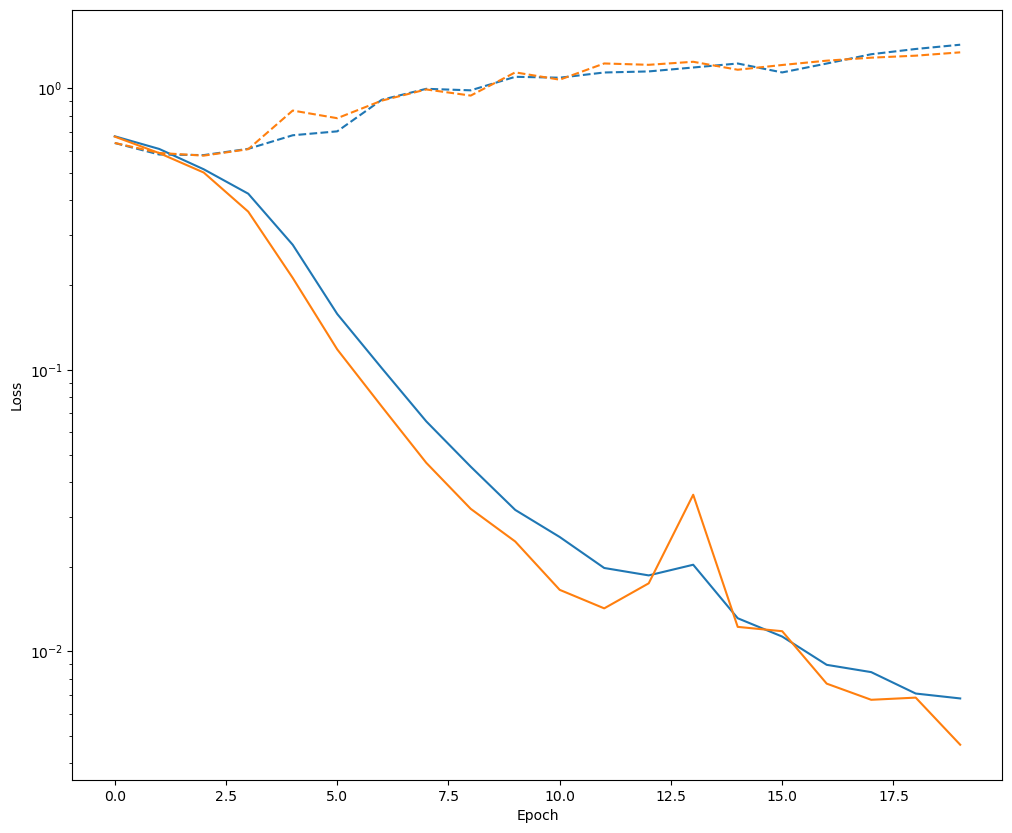

In [146]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [149]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_test, y_test))

Epoch 1/10
14/14 [==============================] - 7s 248ms/step - loss: 0.6769 - tp: 17.0000 - fp: 34.0000 - tn: 340.0000 - fn: 137.0000 - accuracy: 0.6761 - precision: 0.3333 - recall: 0.1104 - auc: 0.5250 - prc: 0.3409 - val_loss: 0.6363 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 76.0000 - val_fn: 30.0000 - val_accuracy: 0.7170 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5796 - val_prc: 0.3395
Epoch 2/10
14/14 [==============================] - 2s 140ms/step - loss: 0.5914 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 298.0000 - fn: 124.0000 - accuracy: 0.7062 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6461 - prc: 0.4879 - val_loss: 0.5793 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 76.0000 - val_fn: 30.0000 - val_accuracy: 0.7170 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6397 - val_prc: 0.4394
Epoch 3/10
14/14 [==============================] - 2s 147ms/step - loss: 0.4772 - tp: 6.0000 - fp: 0.0000e+00 - tn: 298.0

In [150]:
train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

4/4 [==============================] - 0s 34ms/step


In [151]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  1.214333176612854
tp :  9.0
fp :  12.0
tn :  64.0
fn :  21.0
accuracy :  0.6886792182922363
precision :  0.4285714328289032
recall :  0.30000001192092896
auc :  0.5831140279769897
prc :  0.38351893424987793

Legitimate Transactions Detected (True Negatives):  64
Legitimate Transactions Incorrectly Detected (False Positives):  12
Fraudulent Transactions Missed (False Negatives):  21
Fraudulent Transactions Detected (True Positives):  9
Total Fraudulent Transactions:  30


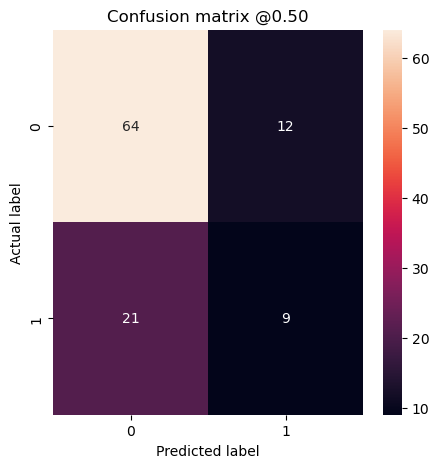

In [154]:
baseline_results = model.evaluate(X_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)

In [176]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1+1.5}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.62
Weight for class 1: 2.50


In [177]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_test, y_test),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/10
14/14 [==============================] - 6s 216ms/step - loss: 1.0995 - tp: 115.0000 - fp: 269.0000 - tn: 105.0000 - fn: 39.0000 - accuracy: 0.4167 - precision: 0.2995 - recall: 0.7468 - auc: 0.5302 - prc: 0.3229 - val_loss: 0.7307 - val_tp: 30.0000 - val_fp: 76.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2830 - val_precision: 0.2830 - val_recall: 1.0000 - val_auc: 0.5399 - val_prc: 0.3210
Epoch 2/10
14/14 [==============================] - 2s 143ms/step - loss: 0.9705 - tp: 124.0000 - fp: 297.0000 - tn: 1.0000 - fn: 0.0000e+00 - accuracy: 0.2962 - precision: 0.2945 - recall: 1.0000 - auc: 0.7037 - prc: 0.4653 - val_loss: 0.9533 - val_tp: 30.0000 - val_fp: 76.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2830 - val_precision: 0.2830 - val_recall: 1.0000 - val_auc: 0.6002 - val_prc: 0.3752
Epoch 3/10
14/14 [==============================] - 2s 151ms/step - loss: 0.7773 - tp: 124.0000 - fp: 268.0000 - tn: 30.0000 - fn: 0.0000e+00 - accur

In [178]:
train_predictions_weighted = weighted_model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(X_test, batch_size=BATCH_SIZE)

4/4 [==============================] - 0s 37ms/step


loss :  0.8692855834960938
tp :  11.0
fp :  11.0
tn :  65.0
fn :  19.0
accuracy :  0.7169811129570007
precision :  0.5
recall :  0.36666667461395264
auc :  0.5918859839439392
prc :  0.3801795244216919

Legitimate Transactions Detected (True Negatives):  65
Legitimate Transactions Incorrectly Detected (False Positives):  11
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  11
Total Fraudulent Transactions:  30


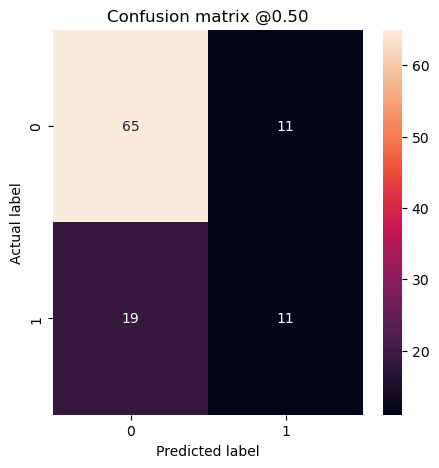

In [179]:
weighted_results = weighted_model.evaluate(X_test, y_test,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_weighted)